install pypub and ffmpeg (5min to install) FFmpeg is the leading multimedia framework, able to decode, encode, transcode, mux, demux, stream, filter and play pretty much anything that humans and machines have created.

had to do ffmpeg -i input.m4a output.wav in terminal

make a requirements text

http://blog.acipo.com/wave-generation-in-python/, https://image-match.readthedocs.io/en/latest/signatures.html

pip install scikits.audiolab

## <font color = 'blue'> Steps:
- get audio
- visualize audio
- get image signature from visual
- store image signature (key) and its corresponding audio (value) in database

- get tattoo

- get image of that tattoo
- query database to find key that best matches this image signature
- play audio of that match

<font color = 'blue'> Import all necessary libraries

In [197]:
import matplotlib.pyplot as plt
import numpy as np
import wave # python: The wave module provides a convenient interface to the WAV sound format
import sys # need? System-specific parameters and functions. 
# This module provides access to some variables used or maintained by the interpreter
from pydub import AudioSegment # Manipulate audio with an simple and easy high level interface. https://github.com/jiaaro/pydub/
import ffmpeg # A complete, cross-platform solution to record, convert and stream audio and video.
import aifc
import struct
import math
from scipy.fftpack import fft, ifft
import io
from image_match.goldberg import ImageSignature
from pydub.playback import play

<font color = 'blue'> In terminal, convert audio file to wav format if it's not already set. ffmpeg -i input.m4a output.wav.
    
<font color = 'blue'> Then load in audio files

<font color = 'blue'>Preliminary fun with audio using Python

In [226]:
# Load in the audio file (ensure format is wav extention)
chinese = AudioSegment.from_wav('chinese.wav')
dexter = AudioSegment.from_wav('dexter.wav')
tv = AudioSegment.from_wav('tv.wav')

In [208]:
chinese.duration_seconds

2.004

In [157]:
# Look at type of audio
type(chinese)

pydub.audio_segment.AudioSegment

In [200]:
# Play audio
-int(len(chinese)/1000) # in milliseconds

-2

<font color = 'blue'>Read an audio file using wave

In [198]:
play(AudioSegment.from_wav('dexter.wav'))

<font color = 'blue'> Get parameters for later

In [280]:
audio.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=422848, comptype='NONE', compname='not compressed')

In [167]:
parameters = audio.getparams() # get the parameters of audio

nchannels = parameters[0]
sampwidth = parameters[1]
framerate = parameters[2]
nframes = parameters[3]
comptype = parameters[4]
compname = parameters[5]

<font color = 'blue'> Plot to visualize audio

In [183]:
type(signal_byte)

bytes

In [231]:
# Open file
audio = wave.open('media.wav','r') # read mode
audio # type: wave object - wave.Wave_read

/Users/PB/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/Users/PB/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


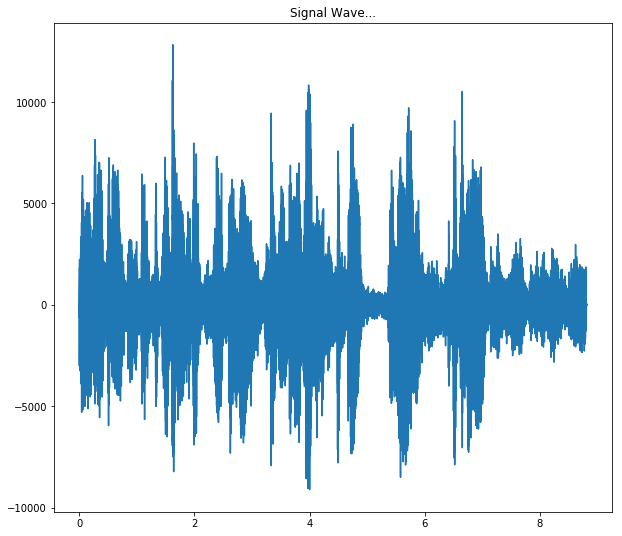

In [232]:
signal_byte = audio.readframes(-1) # gets bytes data from audio ?whats with -1?
signal = np.fromstring(signal_byte, 'Int16') #A new 1-D array of integers from bytes. dtype = int16.
freq = audio.getframerate() # returns frequency

time = np.linspace(0, len(signal)/freq, num=len(signal))

plt.figure(1, figsize=(10,9))
plt.title('Signal Wave...')
plt.plot(time,signal) # fft?
x = plt.savefig('media.png')
plt.show()

In [185]:
from skimage import color
from skimage import io

img = color.rgb2gray(io.imread('dexter.png'))

In [191]:
from PIL import Image
image = Image.open(img)
image.show()

AttributeError: 'numpy.ndarray' object has no attribute 'read'

<font color = 'blue'>Now use the parameters to write an audio file to try and recreate the initial audio

In [169]:
signal

array([-789,  128, 1875, ...,    1,    1,    2], dtype=int16)

In [119]:
tune = wave.open('samira_testback.wav','wb') # create new audio file with write mode
tune

<font color = 'blue'> Set parameters gotten from original audio to new

In [120]:
tune = wave.open('samira_testback.wav','wb') # create new audio file with write mode
tune.setnchannels(nchannels) # channels 1 = mono 2 = stereo (two because of two ears)
tune.setsampwidth(sampwidth)
tune.setframerate(framerate) # specify frame rate to get number of frames. you have duration and rate
tune.setnframes(nframes)
tune.setcomptype(comptype, compname)
tune.writeframes(signal)

<font color = 'blue'> Write the signal into new audio file

In [121]:
tune.writeframes(signal)

In [122]:
tune.close() # need to close out the wave_write object

In [123]:
audio = AudioSegment.from_wav('samira_testback.wav')


In [124]:
audio

## <font color = 'blue'> Get Audio from Sound Wave Image

In [125]:
try:
    #change the file's name and format
    image_file = 'qrcode.png'
    fin = open(image_file, "rb") # type: _io.BufferedReader
    data = fin.read() # convert to bytes
    fin.close()
except IOError:
    print("Image file %s not found" % imageFile)
    raise SystemExit

In [128]:
fin # length of 152687

<_io.BufferedReader name='qrcode.png'>

In [104]:
#Give the name for wav file produced at run time corresponding to the input file
sound_output = wave.open('fromimage.wav', 'w')
sound_output.setparams((nchannels, sampwidth, framerate, nframes, comptype, compname))

In [105]:
hex_str = bytes(data) #convert binary data to string of bytes
sound_output.writeframes(hex_str)


sound_output.close()

In [106]:
AudioSegment.from_wav('some1.wav','rb')

In [ ]:
signal_byte = audio.readframes(-1) # gets bytes data from audio ?whats with -1?
signal = np.fromstring(signal_byte, 'Int16') #A new 1-D array of integers from bytes. dtype = int16.
freq = audio.getframerate() # returns frequency

time = np.linspace(0, len(signal)/freq, num=len(signal))

plt.figure(1, figsize=(10,9))
plt.title('Signal Wave...')
plt.plot(time,signal)
plt.show()



In [48]:
hex_str = bytes(data) #convert binary data to string of bytes
sound_output.writeframes(data)

sound_output.close()

In [49]:
# Open file
audio = wave.open('samira_recreated.wav','r') # read mode
audio # type: wave object - wave.Wave_read

/Users/PB/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/Users/PB/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


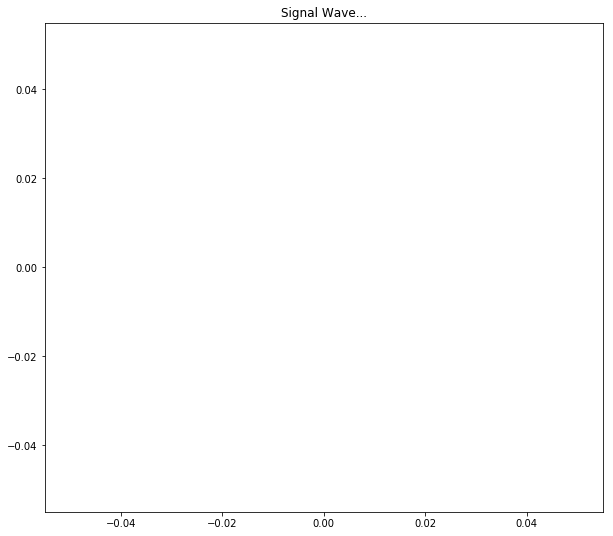

In [230]:
signal_byte = audio.readframes(-1) # gets bytes data from audio ?whats with -1?
signal = np.fromstring(signal_byte, 'Int16') #A new 1-D array of integers from bytes. dtype = int16.
freq = audio.getframerate() # returns frequency

time = np.linspace(0, len(signal)/freq, num=len(signal))

plt.figure(1, figsize=(10,9))
plt.title('Signal Wave...')
plt.plot(time,signal)
x = plt.savefig('image.png')
plt.show()

In [50]:
AudioSegment.from_wav('samira_recreated.wav')

<font color = 'blue'> can also plot with scipy

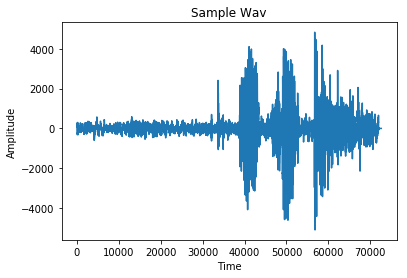

In [70]:
# can also do this in scipy
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# read audio samples
input_data = read("samira.wav")
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio)
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.show()

get derivative equal to zero. get only these points. make a scatter plot, then connect those dots?



In [333]:
gis = ImageSignature()
a = gis.generate_signature('media.png')
b = gis.generate_signature('trial.png')
round(gis.normalized_distance(a, b),2)

0.26

In [360]:
string = ('[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, -1, 1, -1, 1, 2, 0, 0, 0, -1, -2, -1, 1, -1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, -1, -1, -1, 2, -1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, -1, -1, 1, -1, 2, -1, 1, 2, -2, -1, -2, -2, -2, -1, 1, -1, 1, -1, -1, 2, -1, 2, 1, -1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 2, -2, -2, -2, -2, -2, -2, 1, -2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 1, 0, 1, 2, -2, -1, 1, -1, 1, -1, 1, 1, -2, -1, -2, -1, -2, 0, 0, -1, 1, -1, -2, 2, -2, 2, 2, -2, 1, 0, 0, 2, 2, 2, 1, 2, -2, -2, 2, -2, 2, -1, 2, 2, -2, -1, -2, -2, -2, -1, 0, -2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 2, 0, 0, 2, -2, -1, 0, -2, 0, -2, 0, 0, -1, 0, -2, 0, -1, 0, 0, 0, 1, -2, -2, 1, -2, 1, 1, 1, 2, -1, 1, 2, 2, 2, 2, 2, -2, -2, 1, -2, 1, 1, 1, 1, -2, 0, -2, -1, -2, 0, 0, -2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, -1, 2, -2, 0, 0, -2, 0, -2, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -2, 0, 0, 0, 0, -1, -1, -2, -1, 0, 0, 0, -1, 0, -2, -1, 0, 0, 0, -1, 0, 0, -1, 0, -2, 0, -2, 0, 0, -2, 2, -1, -1, 2, -1, 2, -1, -1, -1, -1, 0, 1, 0, -1, -1, 0, 0, 1, 2, 0, 2, 0, -1, 1, -2, 0, 0, -2, 0, -2, -2, 0, 0, 0, 0, 0, 0, -2, 0, -1, 0, 0, 0, 0, -1, 0, -1, -2, 1, 1, 1, 1, 1, 1, -2, -1, 0, 0, 0, -1, 0, -2, -1, 0, 0, 0, -2, 0, -2, -1, 0, -2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, -1, 1, -1, 2, 2, -1, 2, -1, -1, 1, 0, 0, 0, -2, -1, -2, -2, -2, 1, 1, -1, 1, -2, -2, -2, -2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, -2, 1, -2, -2, 1, 0, 0, -2, -1, -2, -2, -1, -2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, -1, -1, 1, 2, -1, 1, -1, -1, -1, -1, 2, 2, -1, -1, -2, -2, -2, 2, 2, -1, 1, -1, -1, -1, -1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, -1, 1, -2, -2, -2, -2, -2, -2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, -2, 2, -2, -2, -2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]',)

In [367]:
[int(char) for char in string[0][1:-1].split(',')]
lsity = [int(y) for y in sting_list]

In [368]:
lsity

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 -1,
 1,
 -1,
 1,
 2,
 0,
 0,
 0,
 -1,
 -2,
 -1,
 1,
 -1,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 2,
 -1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 -1,
 -1,
 1,
 -1,
 2,
 -1,
 1,
 2,
 -2,
 -1,
 -2,
 -2,
 -2,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 2,
 -1,
 2,
 1,
 -1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 1,
 -2,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 0,
 1,
 0,
 1,
 2,
 -2,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -2,
 -1,
 -2,
 -1,
 -2,
 0,
 0,
 -1,
 1,
 -1,
 -2,
 2,
 -2,
 2,
 2,
 -2,
 1,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 -2,
 -2,
 2,
 -2,
 2,
 -1,
 2,
 2,
 -2,
 -1,
 -2,
 -2,
 -2,
 -1,
 0,
 -2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 0,
 2,
 0,
 0,
 2,
 -2,
 -1,
 0,
 -2,
 0,
 -2,
 0,
 0,
 -1,
 0,


In [306]:
bb = gis.generate_signature('trial.png')